#Análisis de componentes principales
Es considerado un método de reducción de dimensiones y nos permite reimaginar nuestros targets para describir lo mejor posible nuestros datos con menos targets.

Se basa en elegir un plano e el cual se puedan proyectar los datos con la mayor varianza posible


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#Cargar los datos
iris = pd.read_csv('https://raw.githubusercontent.com/adrishg/Intersemestral_MachineLearning_Proteco2020/master/DataSets/iris.csv')
iris.head()


,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
etiquetas= iris['species']
datosX= iris.iloc[:,:-1]
datosX
etiquetas.shape

(150,)

In [13]:
datosX.drop(columns='Id', axis=1,inplace=True)
datosX.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
#Escalar los datos
from sklearn.preprocessing import StandardScaler
escala= StandardScaler()
data = escala.fit_transform(datosX.values)

In [19]:
#Vamos a crear una matriz
matriz = np.asmatrix(data)
#Vamos a crear una matriz de covarianza
matrizCovarianza = np.cov(matriz.T)
matrizCovarianza

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [33]:
#Ahora calcular nuestros eigenvalores y nuestros eigenvectores
eigValores, eigVectores = np.linalg.eig(matrizCovarianza)
print(eigValores)
print(eigVectores)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [34]:
#Obtener el número de eigenvalores que queramos sea el número de dimensiones de nuestro nuevo dataset
primerosDos = eigVectores[:,0:2]
primerosDos

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [36]:
nuevosDatos = datosX.dot(primerosDos)
nuevosDatos

,0,1
0,2.669231,-5.180887
1,2.696434,-4.643645
2,2.481163,-4.752183
3,2.571512,-4.626615
4,2.590658,-5.236211
...,...,...
145,7.033251,-5.531352
146,6.613485,-4.889261
147,6.759094,-5.437263
148,6.782974,-5.719634


In [38]:
nuevosDatos= pd.DataFrame(np.hstack((nuevosDatos, np.array(etiquetas).reshape(-1,1))), columns=['PC1','PC2','species'])


In [40]:
nuevosDatos

,PC1,PC2,species
0,2.66923,-5.18089,Iris-setosa
1,2.69643,-4.64365,Iris-setosa
2,2.48116,-4.75218,Iris-setosa
3,2.57151,-4.62661,Iris-setosa
4,2.59066,-5.23621,Iris-setosa
...,...,...,...
145,7.03325,-5.53135,Iris-virginica
146,6.61348,-4.88926,Iris-virginica
147,6.75909,-5.43726,Iris-virginica
148,6.78297,-5.71963,Iris-virginica


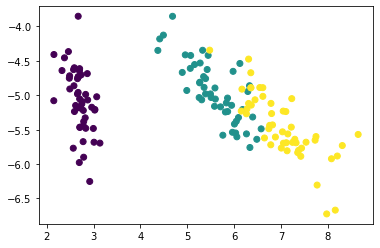

In [46]:
#Graficar en dos dimesiones
etiquetasNumeros= []
for flor in nuevosDatos['species']:
  etiquetasNumeros.append(0 if flor=='Iris-setosa' else 1 if flor=='Iris-versicolor' else 2)

plt.scatter(nuevosDatos['PC1'],nuevosDatos['PC2'], c=etiquetasNumeros)
plt.show()

#Implementación con skLearn


In [48]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=2)
pcaComponentes = pca.fit_transform(data)
print(pcaComponentes.shape)

(150, 2)


In [53]:
nuevosDatosSK = pd.DataFrame(np.hstack((pcaComponentes,np.array(etiquetas).reshape(-1,1))), columns=['PC1','PC2','species'])
nuevosDatosSK

,PC1,PC2,species
0,-2.26454,0.505704,Iris-setosa
1,-2.08643,-0.655405,Iris-setosa
2,-2.36795,-0.318477,Iris-setosa
3,-2.3042,-0.575368,Iris-setosa
4,-2.38878,0.674767,Iris-setosa
...,...,...,...
145,1.87052,0.382822,Iris-virginica
146,1.55849,-0.905314,Iris-virginica
147,1.52085,0.266795,Iris-virginica
148,1.37639,1.01636,Iris-virginica


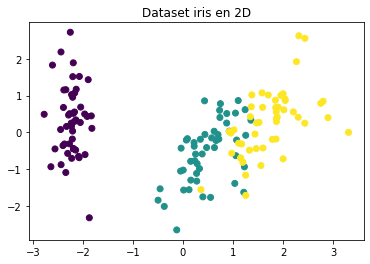

In [61]:
#Graficar en dos dimesiones
plt.scatter(nuevosDatosSK['PC1'],nuevosDatosSK['PC2'], c=etiquetasNumeros)
plt.title('Dataset iris en 2D')
plt.show()